In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [106]:
import warnings as w
w.filterwarnings('ignore')

In [2]:
df= pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8555 entries, 0 to 8554
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  8555 non-null   object 
 1   Height  8555 non-null   float64
 2   Weight  8555 non-null   float64
dtypes: float64(2), object(1)
memory usage: 200.6+ KB


In [4]:
x= df.drop('Weight', axis=1)
y=df['Weight']

In [5]:
x.head()

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [6]:
y.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

In [7]:
df.isnull().sum() 

Gender    0
Height    0
Weight    0
dtype: int64

# convert categorical data to numeric data

In [8]:
# label encoding
from sklearn.preprocessing import LabelEncoder

In [9]:
le = LabelEncoder()

In [10]:
df.Gender = le.fit_transform(df['Gender'])
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [11]:
df.Gender.unique() # Male = 1 , Female = 0

array([1, 0])

In [12]:
x = df.drop('Weight',axis=1)
y = df.Weight

In [13]:
x.shape

(8555, 2)

In [14]:
y.shape

(8555,)

# Train test Split for this data

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=51)

In [17]:
x_train.head()

,Gender,Height
4502,1,66.710391
1430,1,72.611327
195,1,72.294743
7451,0,69.434348
1550,1,67.396020


In [18]:
y_train.head()

4502    174.990112
1430    200.633688
195     208.474866
7451    162.552097
1550    180.659638
Name: Weight, dtype: float64

In [19]:
x_test.head()

,Gender,Height
341,1,64.459814
8528,0,65.508695
3970,1,70.225090
5025,0,64.527182
5605,0,60.276262


In [20]:
y_test.head()

341     161.378773
8528    164.442778
3970    196.949126
5025    132.680868
5605     92.037943
Name: Weight, dtype: float64

# Model fitting with LinearRegression

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lr = LinearRegression()

In [23]:

lr.fit(x_train,y_train)

LinearRegression()

In [24]:
lr.coef_

array([19.26982969,  5.97408518])

In [25]:
lr.intercept_

-244.71820920842433

In [26]:
pred = lr.predict(x_test)
pred

array([159.64004118, 146.63631353, 194.08228831, ..., 164.95980828,
       191.30164009, 152.03964112])

In [27]:
lr.score(x,y)

0.8999461748636963

In [28]:
lr.score(x_train, y_train)

0.9022365137062832

In [29]:
lr.score(x_test,y_test)

0.8944599600824594

In [30]:
# Evaluate Model (Accuracy, MSE, MAE)
from sklearn.metrics import mean_absolute_error,mean_squared_error
accuracy = lr.score(x_test,y_test) # Accuracy
mse = mean_squared_error(y_test,pred)
mae = mean_absolute_error(y_test,pred)

In [31]:
accuracy

0.8944599600824594

In [32]:
mse

106.4179733000685

In [33]:
mae 

8.119090042562583

# KNN ALGORITHM or KNN Regressor

In [34]:
from sklearn.neighbors import KNeighborsRegressor

In [35]:
knn= KNeighborsRegressor()

In [36]:
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [37]:
knn.predict(x_test)

array([156.9582738 , 158.09850914, 194.95924008, ..., 163.53551284,
       186.97362364, 145.97548388])

In [38]:
knn.score(x_test,y_test)

0.8733063390964783

In [39]:
knn.score(x_train, y_train)

0.9206865459994193

In [40]:
knn.score(x,y)

0.9067252213109351

In [41]:
# Evaluate Model (Accuracy, MSE, Prediction)
Accuracy = knn.score(x_test,y_test) # Before Turning Accuracy is 0.8733063390964783
mse = mean_squared_error(y_test,knn.predict(x_test)) # mean squared error 127.74756039369427
Prediction = knn.predict(x_test) # Prediction 

In [42]:
Accuracy


0.8733063390964783

In [43]:
mse

127.74756039369427

In [44]:
Prediction

array([156.9582738 , 158.09850914, 194.95924008, ..., 163.53551284,
       186.97362364, 145.97548388])

In [45]:
from sklearn.metrics import mean_absolute_error #MAE
mae = mean_absolute_error(y_test, pred)
mae

8.119090042562583

# Hyperparameter Optimization for K value using RandomizedSearchCV

In [46]:
from sklearn.model_selection import RandomizedSearchCV

In [47]:
n_neighbors= np.random.randint(5,25,5)
weights= ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_size= np.random.randint(5,50,5)
p= [1,2]

In [48]:
ids= {
    'n_neighbors':n_neighbors,
    'weights':weights,
    'algorithm':algorithm,
    'leaf_size':leaf_size,
    'p':p
}

In [49]:
print(ids)

{'n_neighbors': array([21, 24, 22,  7,  6]), 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'leaf_size': array([37, 26, 38, 21, 16]), 'p': [1, 2]}


In [50]:
from sklearn.model_selection import RandomizedSearchCV

In [51]:
random_search= RandomizedSearchCV(knn, ids, n_iter = 200, cv=3)

In [52]:
random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=3, estimator=KNeighborsRegressor(), n_iter=200,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': array([37, 26, 38, 21, 16]),
                                        'n_neighbors': array([21, 24, 22,  7,  6]),
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']})

In [53]:
random_search.cv_results_

{'mean_fit_time': array([0.00333349, 0.00266743, 0.00201035, 0.0029997 , 0.00299883,
        0.00266504, 0.00267688, 0.00300177, 0.0013233 , 0.00299978,
        0.00333341, 0.00166821, 0.00300058, 0.00133348, 0.00166607,
        0.00299978, 0.00166718, 0.00266679, 0.00299875, 0.00300185,
        0.00299954, 0.002997  , 0.00300097, 0.00333317, 0.00299899,
        0.00100327, 0.00266822, 0.00266759, 0.00298929, 0.00133276,
        0.00233173, 0.00267482, 0.00266822, 0.00300153, 0.00200137,
        0.00166821, 0.00300105, 0.00133308, 0.00133324, 0.00266623,
        0.00266679, 0.0030001 , 0.00201019, 0.00266798, 0.00300209,
        0.00099969, 0.00266663, 0.00300145, 0.00300018, 0.00299788,
        0.00166647, 0.00333325, 0.00266695, 0.0030001 , 0.00299978,
        0.00299939, 0.002666  , 0.0013322 , 0.00300304, 0.00333571,
        0.00299843, 0.00299883, 0.0026629 , 0.00166686, 0.00266655,
        0.00133316, 0.00266592, 0.00299986, 0.00300264, 0.00266512,
        0.00299986, 0.00299907,

In [54]:
cv_result = pd.DataFrame(random_search.cv_results_)
cv_result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_weights,param_p,param_n_neighbors,param_leaf_size,param_algorithm,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003333,4.722696e-04,0.004666,0.000472,distance,2,6,21,kd_tree,"{'weights': 'distance', 'p': 2, 'n_neighbors':...",0.862332,0.874357,0.864256,0.866982,0.005274,192
1,0.002667,4.679993e-04,0.015008,0.000802,uniform,2,7,26,ball_tree,"{'weights': 'uniform', 'p': 2, 'n_neighbors': ...",0.884141,0.896019,0.884273,0.888145,0.005569,60
2,0.002010,1.090141e-05,0.111990,0.003553,uniform,1,22,38,brute,"{'weights': 'uniform', 'p': 1, 'n_neighbors': ...",0.894737,0.902975,0.894453,0.897389,0.003952,26
3,0.003000,1.700793e-06,0.005001,0.000004,distance,2,7,21,kd_tree,"{'weights': 'distance', 'p': 2, 'n_neighbors':...",0.864497,0.875998,0.866406,0.868967,0.005032,172
4,0.002999,5.150430e-07,0.008334,0.000471,distance,1,21,37,auto,"{'weights': 'distance', 'p': 1, 'n_neighbors':...",0.875419,0.883749,0.876627,0.878599,0.003675,135


In [56]:
random_search.best_score_ 

0.8975354570030804

In [59]:
random_search.best_params_ # Best K Values is : 43


{'weights': 'uniform',
 'p': 1,
 'n_neighbors': 24,
 'leaf_size': 38,
 'algorithm': 'kd_tree'}

In [58]:
random_search.score(x_test,y_test)

0.8898095306547302

In [57]:
pred = random_search.predict(x_test)
pred

array([158.47609037, 150.50797712, 196.083093  , ..., 162.61735492,
       189.8642049 , 150.72606685])

In [60]:
knn2= random_search.best_estimator_
knn2

KNeighborsRegressor(algorithm='kd_tree', leaf_size=38, n_neighbors=24, p=1)

In [62]:
knn2.fit(x_train, y_train)

KNeighborsRegressor(algorithm='kd_tree', leaf_size=38, n_neighbors=24, p=1)

In [63]:
knn2.score(x_train,y_train)

0.905301452248876

In [65]:
knn2.score(x_test, y_test)

0.8898095306547302

In [66]:
knn2.score(x,y)

0.9007374426817587

In [67]:
0.8898095306547302-0.8733063390964783 #difference between tuned knn and knn(test)

0.016503191558251973

In [114]:
0.8898095306547302-0.8944599600824594 #difference between tuned knn and linear regression

-0.004650429427729197

In [68]:
# Evaluate Model (Accuracy, MSE, Prediction)
Accuracy = random_search.score(x_test,y_test)
Prediction = random_search.predict(x_test)
mse = mean_squared_error(y_test,Prediction)

print("Accuracy : ", Accuracy)
print("Mean Squared Error : ", mse)

Accuracy :  0.8898095306547302
Mean Squared Error :  111.10708726156221


# KNN Classifier

In [70]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [72]:
df1=df.copy()
df1.Gender=le.fit_transform(df1.Gender)
df1.Gender.head()

0    1
1    1
2    1
3    1
4    1
Name: Gender, dtype: int64

In [73]:
x1= df1.drop('Gender', axis=1)
y1=df1['Gender']

In [74]:
x1.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [75]:
y1.head()

0    1
1    1
2    1
3    1
4    1
Name: Gender, dtype: int64

In [76]:
x1train, x1test,y1train, y1test = train_test_split(x1, y1,test_size=.30, random_state=1)

In [94]:
from sklearn.neighbors import KNeighborsClassifier
clf= KNeighborsClassifier(n_neighbors=10)

In [95]:
clf.fit(x1train,y1train)

KNeighborsClassifier(n_neighbors=10)

In [96]:
y1pred= knn_clf.predict(x1test)

In [97]:
clf.score(x1test,y1test)

0.9216984807167901

In [98]:
clf.score(x1train,y1train)

0.9213426853707415

In [99]:
clf.score(x1,y1)

0.9214494447691408

#  Confusion matrix

In [91]:
# Evaluate Model (Accuracy, Confusion Matrix, ROC, AUC, Classification Report)

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, plot_roc_curve , accuracy_score

In [113]:
clf_report = classification_report(y1test, y1pred)
print(clf_report)# Classification Report 


              precision    recall  f1-score   support

           0       0.89      0.92      0.91      1055
           1       0.94      0.92      0.93      1512

    accuracy                           0.92      2567
   macro avg       0.92      0.92      0.92      2567
weighted avg       0.92      0.92      0.92      2567



In [110]:
con_mat = confusion_matrix(y1test,y1pred)

Text(51.0, 0.5, 'Actual Values')

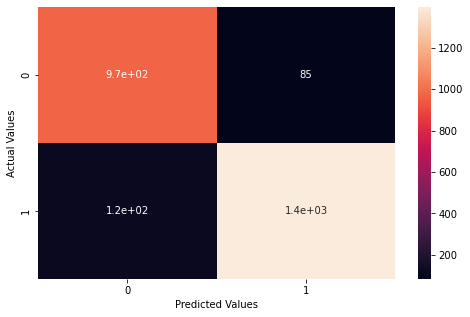

In [111]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.heatmap(con_mat, annot=True)
plt.xlabel('Predicted Values',)
plt.ylabel('Actual Values')

# ROC curve

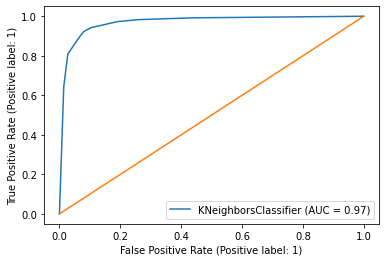

In [107]:
import matplotlib.pyplot as plt
plot_roc_curve(clf, x1test, y1test)
plt.plot([0,1],[0,1])